spect ,general
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
instance is positive
iteration [1]
Spect : ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
gen :[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
instance is positive
iteration [2]
Spect : ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
gen :[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
instance is Negative
iteration [3]
Spect : ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
gen :[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?'

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accc : 0.7835497835497836


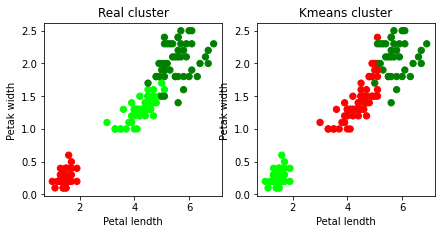

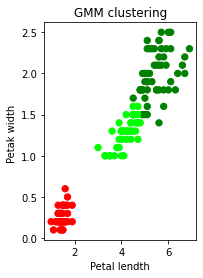

size of training data and its label (135, 4) (135,)
size of testing data and its label (15, 4) (15,)
label 0 - setosa
label 1 - versicolor
label 2 - virginica
Sample: [5.5 2.4 3.8 1.1] Actual-label: 1 Predicted-label: 1
Sample: [6.7 2.5 5.8 1.8] Actual-label: 2 Predicted-label: 2
Sample: [6.6 3.  4.4 1.4] Actual-label: 1 Predicted-label: 1
Sample: [5.2 2.7 3.9 1.4] Actual-label: 1 Predicted-label: 1
Sample: [5.7 3.8 1.7 0.3] Actual-label: 0 Predicted-label: 0
Sample: [5.1 3.3 1.7 0.5] Actual-label: 0 Predicted-label: 0
Sample: [6.8 2.8 4.8 1.4] Actual-label: 1 Predicted-label: 1
Sample: [4.9 2.5 4.5 1.7] Actual-label: 2 Predicted-label: 1
Sample: [5.  3.6 1.4 0.2] Actual-label: 0 Predicted-label: 0
Sample: [5.7 2.8 4.5 1.3] Actual-label: 1 Predicted-label: 1
Sample: [5.7 2.8 4.1 1.3] Actual-label: 1 Predicted-label: 1
Sample: [6.1 2.8 4.  1.3] Actual-label: 1 Predicted-label: 1
Sample: [6.7 3.3 5.7 2.1] Actual-label: 2 Predicted-label: 2
Sample: [5.7 2.5 5.  2. ] Actual-label: 2 Predic

In [1]:
# PROGRAM 3 ################################################################

import pandas as pd
import numpy as np
data = pd.read_csv('enjoy.csv')

concept = np.array(data)[:,:-1]
target =np.array(data)[:,-1]
concept , target

def learn (concept,target):
    sp=concept[0].copy()
    print("spect ,general")
    print(sp)
    gn= [["?" for i in range(len(sp))] for i in range(len(sp))]
    print(gn)
    for i,h in enumerate(concept):
        if target[i]=="Yes":
            print("instance is positive")
            for x in range(len(sp)):
                if h[x]!=sp[x]:
                    sp[x]='?'
                    gn[x][x]='?'
        if target[i]=="No":
            print("instance is Negative")
            for x in range(len(sp)):
                if h[x]!=sp[x]:
                    gn[x][x]=sp[x]
                else:
                    gn[x][x]='?'
                    
        print("iteration ["+str(i+1)+"]")
        print("Spect : "+str(sp))
        print("gen :"+str(gn))
    gn=[gn[i] for i,h in enumerate(gn) if h!=["?" for x in range(len(sp))]]
    return gn,sp

gn,sp=learn(concept,target)

print("Final hypothesis: ")
print("Specific: "+str(sp))
print("General: "+str(gn))

############################################################################
# PROGRAM 5 ################################################################


import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)


epoch=1000
lr=0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1 
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


for i in range(epoch):

    h_ip=np.dot(X,wh)+bh
    h_act = sigmoid(h_ip)
    o_ip=np.dot(h_act,wout)
    output = sigmoid(o_ip)

    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad

    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(h_act)
    d_hidden = EH * hiddengrad

    wout += h_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hidden) *lr
    
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


############################################################################
# PROGRAM 6 ################################################################

import pandas as pd
data =pd.read_csv('data.csv')
data.describe()

from sklearn.model_selection import train_test_split
x=data.drop('Outcome',axis=1)
y=data[['Outcome']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn import metrics
print("Accc :",metrics.accuracy_score(y_test,y_pred))

############################################################################
# PROGRAM 7 ################################################################

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['sl','sw','pl','pw']
y=pd.DataFrame(iris.target)
y.columns=['target']

model=KMeans(n_clusters=3)
model.fit(x)
plt.figure(figsize=(7,7))
colormap = np.array(['red','lime','green'])

plt.subplot(2,2,1)
plt.scatter(x.pl,x.pw,c=colormap[y.target],s=40)
plt.title("Real cluster")
plt.xlabel("Petal lendth")
plt.ylabel("Petak width ")

plt.subplot(2,2,2)
plt.scatter(x.pl,x.pw,c=colormap[model.labels_],s=40)
plt.title("Kmeans cluster")
plt.xlabel("Petal lendth")
plt.ylabel("Petak width ")
plt.show()

#--------------------------------------------------------------

from sklearn import preprocessing
scaler =preprocessing.StandardScaler()
scaler.fit(x)
xsa=scaler.transform(x)
xs=pd.DataFrame(xsa,columns=x.columns)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)

plt.subplot(1,2,2)
plt.scatter(x.pl,x.pw,c=colormap[gmm_y],s=40)
plt.title("GMM clustering")
plt.xlabel("Petal lendth")
plt.ylabel("Petak width ")
plt.show()


############################################################################
# PROGRAM 8 ################################################################

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris = datasets.load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target, test_size=0.1)

print("size of training data and its label",x_train.shape, y_train.shape)
print("size of testing data and its label",x_test.shape, y_test.shape)

for i in range(len(iris.target_names)):
    print("label",i, "-",str(iris.target_names[i]))

classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

for r in range(0,len(x_test)):
    print("Sample:",str(x_test[r]), "Actual-label:",str(y_test[r]), "Predicted-label:",str(y_pred[r]))
print("classification accuracy:", classifier.score(x_test,y_test))

############################################################################